# Data dictionary 

* ssn = means Social Security Number which is the main official identification system for people in the US.
* cc_num = refers to a credit card number which is attached to an account (`acc_num`). 
* first  = First Name      
* last = Last Name        
* gender = Gender either male or female      
* street  = Home address of credit card owner    
* city  = City of credit card owner      
* state   = American state name of the credit card owner
* zip = zip code
* lat = Latitude
* long = Longitude
* city_pop = City population
* job  = Job of credit card owner
* dob = Date of Birth
* acct_num    = Account number the credit card is linked to
* trans_num   = Transaction number
* unix_time   = method to represent a timestamp, and is usually defined as the number of seconds since the beginning of the Unix epoch, which is January 1st, 1970, at midnight (UTC).
* category  = Categorisation of the transaction, Ex. Gas_transport, groecy_pos, shopping_pos
* amt = Total sum paid
* is_fraud    = Either 0 for not fraud or 1 for fraud
* merchant    = Name of seller for transaction
* merch_lat   = Merchant latitude
* merch_long   = Merchant longitude


# Step 1: Data understanding

* Import data

* Collect inital data

* Describe data

* Verify data quality

* Explore data

(Hotz, 2023)

## Step 1.1 - Import data

In [1]:
import pandas as pd
import glob
import os

In [2]:
# Get the current directory
current_directory = 'C:/Users/ans_b/OneDrive/UTS School/Machine Learning/Assignment 3/bank_transactions/final'


# Get a list of all files in the current directory
files = [file for file in os.listdir(current_directory) if (file.endswith('.csv') & file.startswith('transaction'))]

# Create an empty list to store the individual DataFrames
dataframes = []

# Read each CSV file and append its DataFrame to the list
for file in files:
    file_path = os.path.join(current_directory, file)
    df = pd.read_csv(file_path, delimiter='|')
    dataframes.append(df)

# Merge all the DataFrames into a single DataFrame
transactions_df = pd.concat(dataframes, ignore_index=True)

In [3]:
transactions_df

,cc_num,acct_num,trans_num,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long
0,4218196001337,888022315787,91ab12e73ef38206e1121e9648d2408d,1558719550,gas_transport,69.12,0,Phillips Group,39.491416,-75.588522
1,4218196001337,888022315787,071553d533a6822a4431c354c434ddcb,1569425519,grocery_pos,68.11,0,Tucker Ltd,40.890319,-75.573359
2,4218196001337,888022315787,0cfad38ef15e4749eff68dc83f62c151,1577205601,misc_net,40.35,0,Dixon PLC,39.244958,-74.475327
3,4218196001337,888022315787,5782693d7c70f062f258cb30bfa8900f,1571428238,grocery_pos,96.22,0,Lambert-Cooper,39.656925,-75.802342
4,4218196001337,888022315787,35fd7db657d7e30dd608c37f7798186e,1549840400,gas_transport,71.89,0,Griffith LLC,40.313342,-74.220434
...,...,...,...,...,...,...,...,...,...,...
4260899,4246163034387,21414345345,7432f399b000172fcc1e8790f6fc965b,1590472417,misc_pos,1.71,0,Moore and Sons,39.947898,-73.705782
4260900,4246163034387,21414345345,7b6dda3778381981a53b9aa5043fff15,1624189162,entertainment,1.85,0,"Orr, Miller and Lester",40.986267,-73.403986
4260901,4246163034387,21414345345,a42a8a1fa3919010412c0302912acf67,1607057141,shopping_pos,5.22,0,Petersen-Davis,40.973092,-74.058395
4260902,4246163034387,21414345345,45f5c90dd51fe578857b2c6fa8e55c64,1621153529,entertainment,7.79,0,"Castillo, Valenzuela and Rodriguez",41.133557,-73.279871


In [4]:
customers_df = pd.read_csv('C:/Users/ans_b/OneDrive/UTS School/Machine Learning/Assignment 3/bank_transactions/final/customers.csv',encoding='UTF-8',engine='python',sep='|')
customers_df

,ssn,cc_num,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,acct_num
0,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,-75.2156,32412,Accounting technician,1959-10-03,888022315787
1,715-55-5575,4351161559407816183,Elaine,Fuller,F,310 Kendra Common Apt. 164,Leland,NC,28451,34.2680,-78.0578,27112,Professor Emeritus,1963-06-07,917558277935
2,167-48-5821,4192832764832,Michael,Cameron,M,05641 Robin Port,Cordova,SC,29039,33.4275,-80.8857,4215,International aid/development worker,1973-05-30,718172762479
3,406-83-7518,4238849696532874,Brandon,Williams,M,26916 Carlson Mountain,Birmingham,AL,35242,33.3813,-86.7046,493806,Seismic interpreter,1942-12-26,947268892251
4,697-93-1877,4514627048281480,Lisa,Hernandez,F,809 Burns Creek,Fargo,GA,31631,30.7166,-82.5801,559,Medical laboratory scientific officer,1939-05-22,888335239225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,392-96-7670,30125158904184,Sarah,Martin,F,1666 Jenna Unions,Denver,CO,80236,39.6535,-105.0376,990452,Colour technologist,1993-08-31,201218361926
996,594-17-7993,180047909863618,Erin,Wells,F,444 Alexis Estate Suite 824,Wasco,CA,93280,35.6480,-119.4487,27152,Software engineer,1982-05-27,921460407733
997,196-93-1156,4371450311809,Michael,James,M,914 Cassandra Gateway Suite 061,Escondido,CA,92026,33.1605,-117.0978,171802,Agricultural consultant,1999-05-14,499348764671
998,895-65-9304,3519925692476886,Michael,Lewis,M,34141 Katelyn Path,Mattapan,MA,2126,42.2739,-71.0939,25562,Civil Service administrator,1994-02-23,617852071065


## Step 1.2 - Merge datasets and collect inital data

In [5]:
df = pd.merge(customers_df, transactions_df, on=['cc_num', 'acct_num'], how='inner')

# Printing the merged dataset
df.head()

,ssn,cc_num,first,last,gender,street,city,state,zip,lat,...,dob,acct_num,trans_num,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long
0,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,...,1959-10-03,888022315787,91ab12e73ef38206e1121e9648d2408d,1558719550,gas_transport,69.12,0,Phillips Group,39.491416,-75.588522
1,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,...,1959-10-03,888022315787,071553d533a6822a4431c354c434ddcb,1569425519,grocery_pos,68.11,0,Tucker Ltd,40.890319,-75.573359
2,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,...,1959-10-03,888022315787,0cfad38ef15e4749eff68dc83f62c151,1577205601,misc_net,40.35,0,Dixon PLC,39.244958,-74.475327
3,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,...,1959-10-03,888022315787,5782693d7c70f062f258cb30bfa8900f,1571428238,grocery_pos,96.22,0,Lambert-Cooper,39.656925,-75.802342
4,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,...,1959-10-03,888022315787,35fd7db657d7e30dd608c37f7798186e,1549840400,gas_transport,71.89,0,Griffith LLC,40.313342,-74.220434


In [6]:
# Display the shape of the df
df.shape

(4260904, 23)

In [7]:
# Look at 5 random rows of the df
df.sample(10)

,ssn,cc_num,first,last,gender,street,city,state,zip,lat,...,dob,acct_num,trans_num,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long
889045,254-42-7115,3592906007806868,Karen,Yates,F,7318 Heather Lodge,Pooler,GA,31322,32.1149,...,1972-05-23,391412017641,1ad93eff70ea37118590339c8ed9aa83,1648432518,kids_pets,24.10,0,"Pitts, Brown and Zavala",31.219306,-80.915049
3406984,210-58-8616,4058416806134954,Jennifer,Mcdonald,F,0586 Hanson Port Suite 383,Missouri City,TX,77459,29.5704,...,1981-05-19,682282682147,d3311047e981b268ec4bb75006f7204e,1654349499,kids_pets,19.98,0,"Randall, Robinson and Ramos",28.994574,-95.805403
753426,550-68-0631,213177038860861,Kelli,Mccoy,F,47644 Jackson Hill,Roosevelt,NY,11575,40.6802,...,1928-03-15,59781790776,6e8a848289f9ed46a70e9b0c4672f2ac,1659997443,food_dining,2.79,0,"Huber, Schwartz and Carter",41.349450,-72.927871
64638,312-37-3444,6577738721489511,Robert,Potter,M,32003 Carr Trafficway Apt. 769,Donora,PA,15033,40.1768,...,1992-01-06,767589450881,293ae9bd25da7649f5ff8dec2b0eddd8,1549215816,gas_transport,84.16,0,Patel-Knight,39.231663,-79.653055
3313850,356-11-4391,373409185805589,Natalie,Daniel,F,7449 Caldwell Gateway,Kingston,NY,12401,41.9697,...,1963-03-06,127416241238,96c70bc4b65a3253d28a2bfeca63eb59,1557954629,gas_transport,19.88,0,Walker-Mitchell,41.557989,-74.428598
546309,047-22-8068,4149331637351605,Tammy,Monroe,F,7982 Smith Street,North Olmsted,OH,44070,41.4201,...,1945-08-14,920981907761,7ce4418fa6bd0dc8795baa1941546d4f,1609354812,entertainment,36.79,0,"Smith, Yates and Wolfe",42.223870,-82.913034
1885620,342-26-4244,4216667080850960851,Rachel,Vasquez,F,119 Terri Tunnel Apt. 828,Bainbridge Island,WA,98110,47.6478,...,1974-04-28,672026861824,be1bcb6d2b625cda49219c7b5aa0ca3e,1651938246,misc_pos,122.20,0,White-Moreno,47.897379,-122.631062
1429922,147-99-5072,213171752421497,Jack,Davis,M,747 Hines Mills,Park Hills,MO,63601,37.8498,...,1954-07-04,137180523039,117911865b531024614583c41753d046,1659950312,personal_care,47.34,0,Ortiz-Barber,37.160641,-89.852315
2444976,807-92-4720,4491165020002456,Margaret,Willis,F,32155 Jared Islands,Plano,TX,75025,33.0784,...,1997-10-18,36423595547,19647ee6191833d13ee74ae1e06e7858,1644408199,home,33.23,0,Ward and Sons,33.344204,-97.401113
3624272,179-28-4940,213104172415534,Tom,Sanders,M,8557 Singleton Prairie,Orlando,FL,32817,28.5891,...,1987-07-10,190628570290,4c578c7e36270691961fd73805432e52,1587819401,misc_pos,347.90,0,Brown LLC,29.117300,-80.980897


## Step 1.3 - Describe data

In [8]:
# Check how many rows and columns, how many non-null values and datatype of the datasets
df.info(verbose=True)
# (So, 2023)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4260904 entries, 0 to 4260903
Data columns (total 23 columns):
 #   Column      Dtype  
---  ------      -----  
 0   ssn         object 
 1   cc_num      object 
 2   first       object 
 3   last        object 
 4   gender      object 
 5   street      object 
 6   city        object 
 7   state       object 
 8   zip         int64  
 9   lat         float64
 10  long        float64
 11  city_pop    int64  
 12  job         object 
 13  dob         object 
 14  acct_num    object 
 15  trans_num   object 
 16  unix_time   object 
 17  category    object 
 18  amt         float64
 19  is_fraud    object 
 20  merchant    object 
 21  merch_lat   float64
 22  merch_long  float64
dtypes: float64(5), int64(2), object(16)
memory usage: 780.2+ MB


In [9]:
df.describe()

,zip,lat,long,city_pop,amt,merch_lat,merch_long
count,4.260904e+06,4.260904e+06,4.260904e+06,4.260904e+06,4.260904e+06,4.260904e+06,4.260904e+06
mean,5.190384e+04,3.735269e+01,-9.247593e+01,3.038011e+05,6.898790e+01,3.735276e+01,-9.247610e+01
std,2.996720e+04,5.474364e+00,1.740613e+01,5.696231e+05,1.618467e+02,5.504630e+00,1.741603e+01
min,1.571000e+03,1.958930e+01,-1.593683e+02,1.050000e+02,1.000000e+00,1.859001e+01,-1.603677e+02
25%,2.750500e+04,3.378360e+01,-9.868950e+01,2.010300e+04,9.100000e+00,3.370138e+01,-9.903072e+01
50%,4.920200e+04,3.824200e+01,-8.717940e+01,6.759300e+04,4.449000e+01,3.819365e+01,-8.727445e+01
75%,7.870400e+04,4.098200e+01,-7.994400e+01,2.420370e+05,8.158000e+01,4.120567e+01,-7.966098e+01
max,9.970500e+04,6.478050e+01,-6.824480e+01,2.906700e+06,4.130053e+04,6.577610e+01,-6.724632e+01


In [10]:
df.describe(include=['O'])

,ssn,cc_num,first,last,gender,street,city,state,job,dob,acct_num,trans_num,unix_time,category,is_fraud,merchant
count,4260904,4260904,4260904,4260904,4260904,4260904,4260904,4260904,4260904,4260904,4260904,4260904,4260904,4260904,4260904,4260904
unique,983,983,365,479,2,983,726,51,505,962,983,4260904,4114752,14,2,21977
top,205-73-5783,347208496498560,Jennifer,Williams,F,2531 Diane Landing Apt. 510,Brooklyn,CA,Computer games developer,1999-12-23,11546128003,91ab12e73ef38206e1121e9648d2408d,1671189002,shopping_pos,0,Smith PLC
freq,10912,10912,108945,110907,2175896,10912,74282,505426,33859,16747,10912,1,5,420268,4255870,5737


In [11]:
df['is_fraud'].value_counts()

0    4255870
1       5034
Name: is_fraud, dtype: int64

## Step 1.4 - Verify data quality

In [12]:
df.isnull().sum()

ssn           0
cc_num        0
first         0
last          0
gender        0
street        0
city          0
state         0
zip           0
lat           0
long          0
city_pop      0
job           0
dob           0
acct_num      0
trans_num     0
unix_time     0
category      0
amt           0
is_fraud      0
merchant      0
merch_lat     0
merch_long    0
dtype: int64

In [13]:
df.duplicated().sum()

0

## Step 1.5 - Explore data

In [14]:
# Unique values in 'state'
unique_states = df['state'].unique()
print(f"Unique States: {unique_states}")

Unique States: ['PA' 'NC' 'SC' 'AL' 'GA' 'LA' 'MI' 'CA' 'FL' 'TX' 'NY' 'IL' 'MA' 'IA'
 'WA' 'MO' 'NM' 'KY' 'WI' 'IN' 'CO' 'KS' 'MD' 'AZ' 'MS' 'OH' 'CT' 'HI'
 'MN' 'AR' 'ME' 'NJ' 'VA' 'WV' 'NV' 'TN' 'UT' 'AK' 'NE' 'OR' 'OK' 'DE'
 'MT' 'RI' 'ID' 'ND' 'DC' 'WY' 'VT' 'SD' 'NH']


C:\Users\ans_b\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


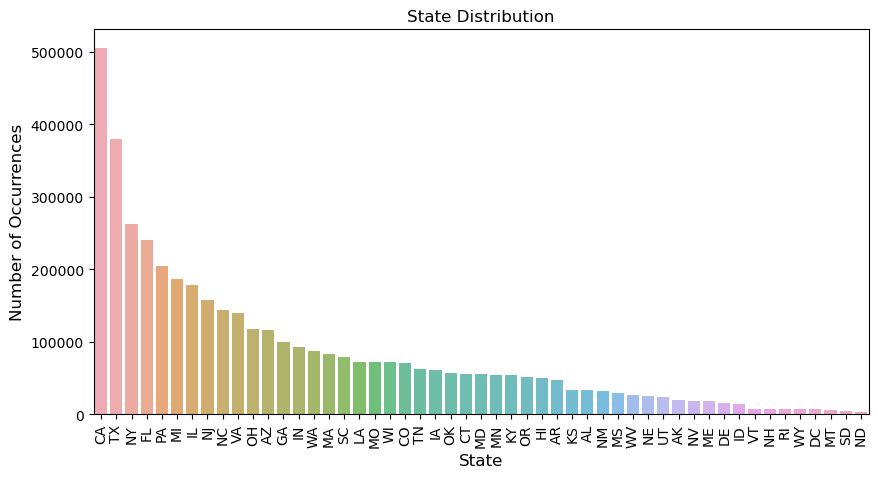

In [15]:
import matplotlib.pyplot as plt 
import seaborn as sns
# Unique values in 'state' with distribution
unique_states = df['state'].value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(unique_states.index, unique_states.values, alpha=0.8)
plt.title('State Distribution')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('State', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [16]:
# Unique values in 'city'
unique_cities = df['city'].unique()
print(f"Unique Cities: {unique_cities}")

Unique Cities: ['Ambler' 'Leland' 'Cordova' 'Birmingham' 'Fargo' 'Forsyth' 'Patterson'
 'Rochester' 'Lakewood' 'Glendale' 'Pensacola' 'Sherman' 'Selden'
 'Nacogdoches' 'Donora' 'Fayetteville' 'Rockford' 'Hollywood'
 'Winston Salem' 'Medfield' 'Urbandale' 'Jacksonville' 'Seattle' 'Boston'
 'Upland' 'Fulton' 'Albuquerque' 'Coarsegold' 'Brandenburg'
 'Black River Falls' 'Pomona' 'Martinsville' 'Turlock' 'Ball' 'Denver'
 'Wantagh' 'Brooklyn' 'Austin' 'Russell' 'Lexington Park' 'Fort Wayne'
 'San Simon' 'Muleshoe' 'Stanley' 'New Haven' 'Walhalla' 'Hornbeck'
 'Everson' 'Claypool' 'Biloxi' 'Clinton' 'W Hartford' 'Central Islip'
 'Southaven' 'Honolulu' 'Lake City' 'Cleveland' 'Westford' 'Santa Cruz'
 'Bainbridge' 'Rancho Cucamonga' 'Elk Grove Village' 'Battle Creek'
 'Radcliff' 'Springdale' 'Emporia' 'Goldsboro' 'West Cornwall'
 'York Haven' 'Miccosukee Cpo' 'Redwood City' 'Knoxville' 'Hattiesburg'
 'Forks' 'Nashville' 'Los Angeles' 'Phoenix' 'Little Rock' 'Richmond'
 'Gurley' 'Concord' 'Porta

C:\Users\ans_b\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


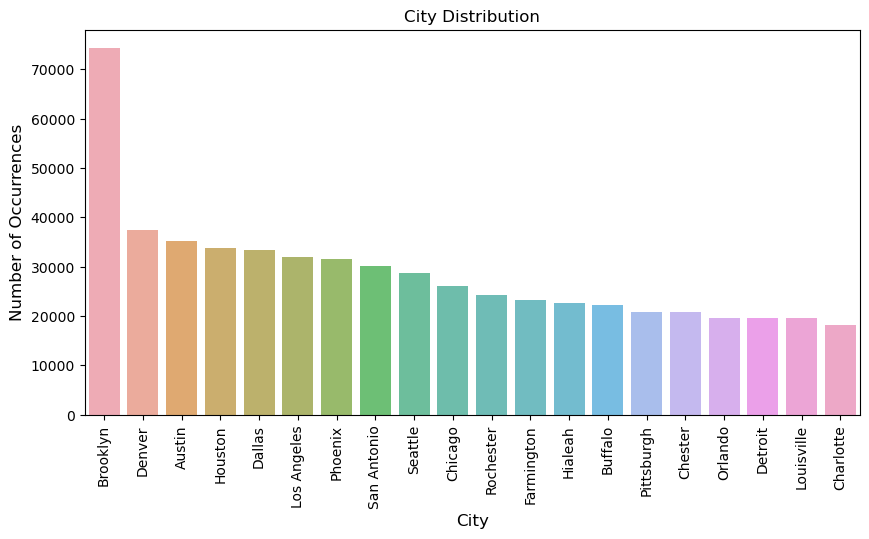

In [17]:
# Unique values in 'city' with distribution
unique_cities = df['city'].value_counts().head(20)  # limiting to top 20 for visualization
plt.figure(figsize=(10, 5))
sns.barplot(unique_cities.index, unique_cities.values, alpha=0.8)
plt.title('City Distribution')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('City', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [18]:
# Distribution of 'gender'
gender_distribution = df['gender'].value_counts(normalize=True)
print("Gender Distribution:\n", gender_distribution)

Gender Distribution:
 F    0.510665
M    0.489335
Name: gender, dtype: float64


In [19]:
# All spending categories with distribution
spending_categories = df['category'].value_counts()
print(f"All Spending Categories with distribution:\n {spending_categories}")

All Spending Categories with distribution:
 shopping_pos      420268
home              403237
grocery_pos       401000
kids_pets         372055
gas_transport     365233
food_dining       320989
entertainment     312478
shopping_net      307013
personal_care     300730
misc_pos          281977
health_fitness    265986
misc_net          191290
grocery_net       181614
travel            137034
Name: category, dtype: int64


In [20]:
# Amount of customers
total_customers = df['ssn'].nunique()
print(f"Total number of customers: {total_customers}")

Total number of customers: 983


In [21]:
# Distribution of 'is_fraud'
fraud_distribution = df['is_fraud'].value_counts(normalize=True)
print("Fraud Distribution:\n", fraud_distribution)

Fraud Distribution:
 0    0.998819
1    0.001181
Name: is_fraud, dtype: float64


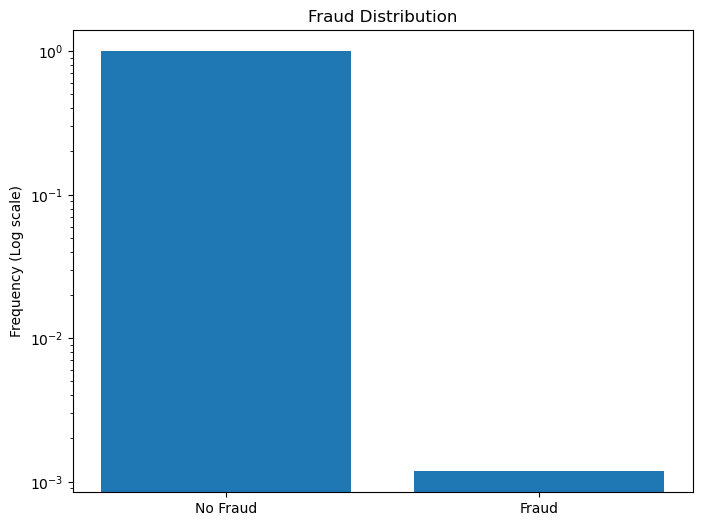

In [22]:
# Make the plot
import numpy as np
plt.figure(figsize=(8,6))
plt.bar(fraud_distribution.index, fraud_distribution.values, log=True) # Set log scale
plt.title('Fraud Distribution')
plt.xticks(np.arange(2), ('No Fraud', 'Fraud'))
plt.ylabel('Frequency (Log scale)')
plt.show()

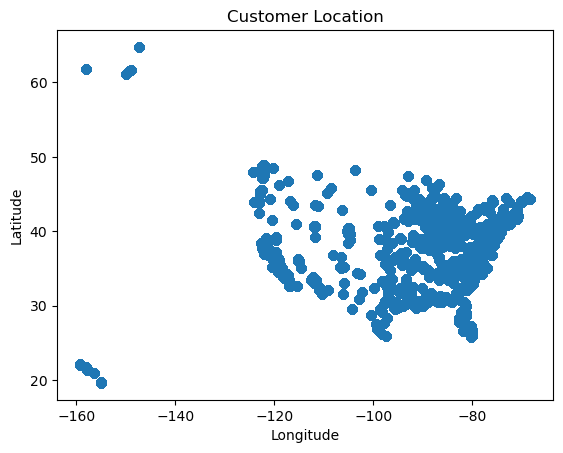

In [23]:
# Plotting Customer Location
plt.scatter(df['long'], df['lat'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Customer Location')
plt.show()

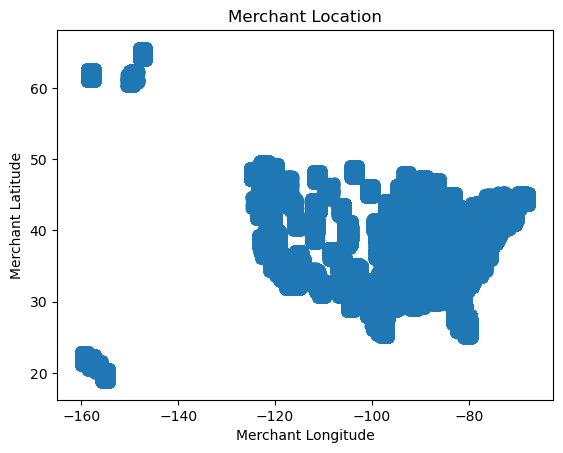

In [24]:
# Plotting Merchant Location
plt.scatter(df['merch_long'], df['merch_lat'])
plt.xlabel('Merchant Longitude')
plt.ylabel('Merchant Latitude')
plt.title('Merchant Location')
plt.show()

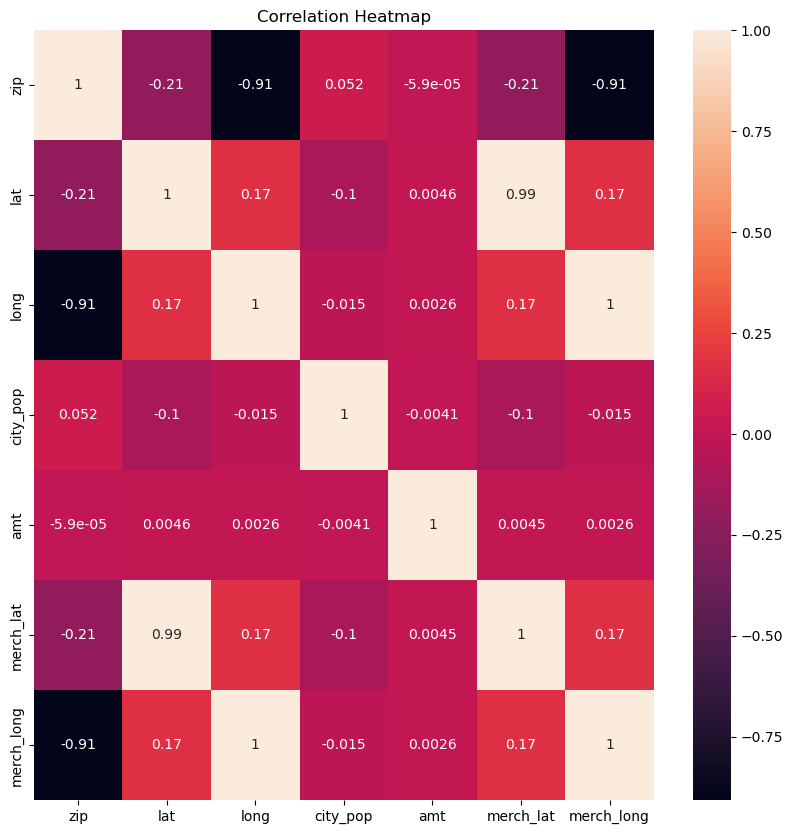

In [25]:
# Plotting correlation heatmap
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)
plt.title('Correlation Heatmap')
plt.show()

# 2. Data Preparation

## 2.1 Feature Engineering

In [26]:
# Step 1: Feature Engineering
# Convert 'unix_time' to datetime object
df['unix_time'] = pd.to_datetime(df['unix_time'], unit='s')

# Create new features
df['transaction_hour'] = df['unix_time'].dt.hour
df['transaction_day'] = df['unix_time'].dt.dayofweek
df['average_transaction_amt'] = df.groupby('cc_num')['amt'].transform('mean')
df['age'] = (pd.to_datetime('today') - pd.to_datetime(df['dob'])).astype('<m8[Y]')


# Select features for anomaly detection
features = ['transaction_hour', 'transaction_day', 'average_transaction_amt', 'amt', 'age', 'zip', 'lat', 'long', 'city_pop']
df_model = df[features]

Feature Rankings:
1. amt (0.6496)
2. transaction_hour (0.0957)
3. average_transaction_amt (0.0651)
4. transaction_day (0.0495)
5. age (0.0349)
6. lat (0.0271)
7. city_pop (0.0264)
8. zip (0.0259)
9. long (0.0259)


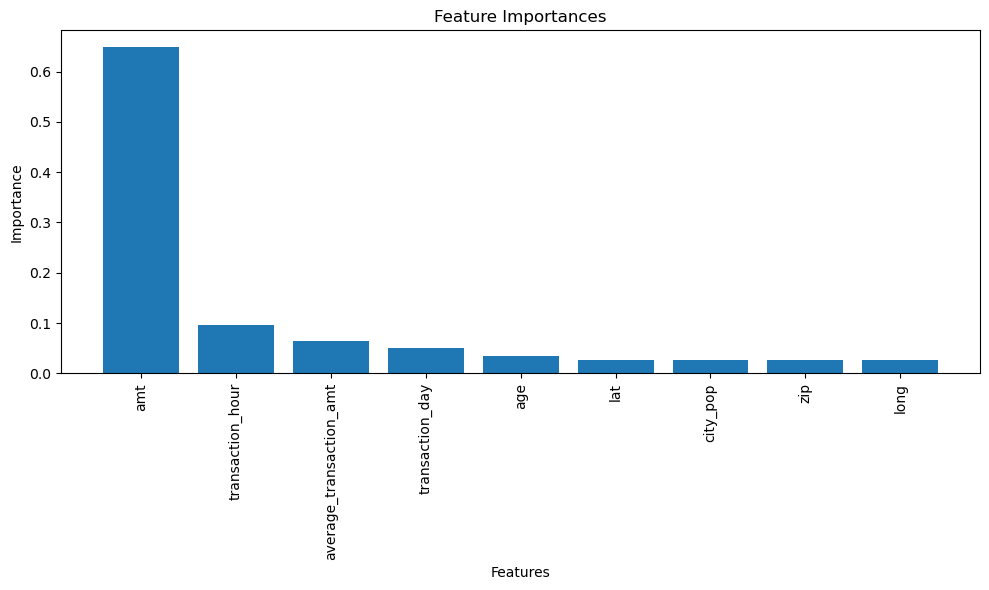

In [27]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

# Convert 'is_fraud' column to numeric type
df['is_fraud'] = df['is_fraud'].astype(int)

# Split the data into features and target
X = df_model.values
y = df['is_fraud'].values

# Create an instance of ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print feature rankings
print("Feature Rankings:")
for i, index in enumerate(indices):
    print(f"{i+1}. {df_model.columns[index]} ({importances[index]:.4f})")

# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [df_model.columns[index] for index in indices], rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

In [28]:
#Import necessary libaries 
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA
from pandas import DataFrame

In [29]:
# Normalize the features
scaler = StandardScaler()
df_model_normalized = scaler.fit_transform(df_model)

# Modelling

## 3.1 Model Training

In [30]:
# Train Isolation Forest model
model1 = IsolationForest(contamination=0.01)  # adjust contamination as needed
model1.fit(df_model_normalized)

# Train Isolation Forest with different parameters
model2 = IsolationForest(contamination=0.05, max_samples=100)
model2.fit(df_model_normalized)

# Train Local Outlier Factor with different parameters
model3 = LocalOutlierFactor(novelty=True, contamination=0.05, n_neighbors=15)
model3.fit(df_model_normalized)

# Train Local Outlier Factor with different parameters
model4 = LocalOutlierFactor(novelty=True, contamination=0.1, n_neighbors=20)
model4.fit(df_model_normalized)


LocalOutlierFactor(contamination=0.1, novelty=True)

# 4. Evaluation

## 4.1 Model Evaluation

In [31]:
# Evaluate Isolation Forest model1
df['anomaly_model1'] = model1.predict(df_model_normalized)
df['anomaly_model1'] = df['anomaly_model1'].map({1: 0, -1: 1})
print(df[df['anomaly_model1'] == 1].head())

# Evaluate Isolation Forest model2
df['anomaly_model2'] = model2.predict(df_model_normalized)
df['anomaly_model2'] = df['anomaly_model2'].map({1: 0, -1: 1})
print(df[df['anomaly_model2'] == 1].head())

# Evaluate Local Outlier Factor model3
df['anomaly_model3'] = model3.predict(df_model_normalized)
df['anomaly_model3'] = df['anomaly_model3'].map({1: 0, -1: 1})
print(df[df['anomaly_model3'] == 1].head())

# Evaluate Local Outlier Factor model4
df['anomaly_model4'] = model4.predict(df_model_normalized)
df['anomaly_model4'] = df['anomaly_model4'].map({1: 0, -1: 1})
print(df[df['anomaly_model4'] == 1].head())

               ssn            cc_num    first       last gender  \
11777  406-83-7518  4238849696532874  Brandon   Williams      M   
15898  697-93-1877  4514627048281480     Lisa  Hernandez      F   
25104  347-03-9639   213193010310510    Kayla    Ramirez      F   
26044  347-03-9639   213193010310510    Kayla    Ramirez      F   
26106  347-03-9639   213193010310510    Kayla    Ramirez      F   

                               street        city state    zip      lat  ...  \
11777          26916 Carlson Mountain  Birmingham    AL  35242  33.3813  ...   
15898                 809 Burns Creek       Fargo    GA  31631  30.7166  ...   
25104  82997 Kristen Valley Suite 311   Patterson    LA  70392  29.6967  ...   
26044  82997 Kristen Valley Suite 311   Patterson    LA  70392  29.6967  ...   
26106  82997 Kristen Valley Suite 311   Patterson    LA  70392  29.6967  ...   

           amt  is_fraud                  merchant  merch_lat merch_long  \
11777  2076.66         0                

Evaluation Metrics for Model 1:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99   4255870
           1       0.01      0.07      0.02      5034

    accuracy                           0.99   4260904
   macro avg       0.50      0.53      0.51   4260904
weighted avg       1.00      0.99      0.99   4260904

Evaluation Metrics for Model 2:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97   4255870
           1       0.01      0.34      0.02      5034

    accuracy                           0.95   4260904
   macro avg       0.50      0.65      0.49   4260904
weighted avg       1.00      0.95      0.97   4260904

Evaluation Metrics for Model 3:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98   4255870
           1       0.00      0.04      0.00      5034

    accuracy                           0.96   4260904
   macro avg       0.50      0.5

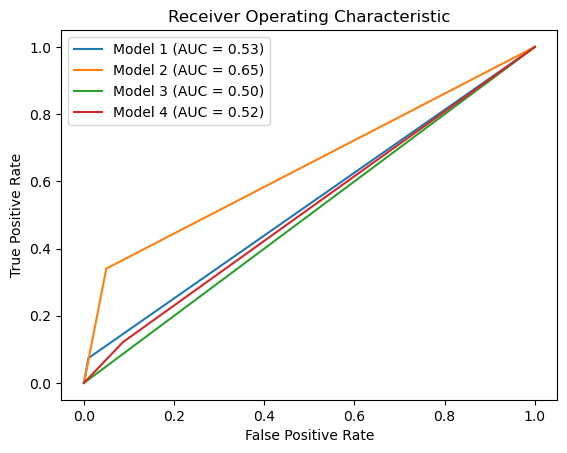

In [32]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

# Convert 'is_fraud' column to numeric type
df['is_fraud'] = df['is_fraud'].astype(int)

# Calculate evaluation metrics for model1
print("Evaluation Metrics for Model 1:")
print(classification_report(df['is_fraud'], df['anomaly_model1']))

# Calculate evaluation metrics for model2
print("Evaluation Metrics for Model 2:")
print(classification_report(df['is_fraud'], df['anomaly_model2']))

# Calculate evaluation metrics for model3
print("Evaluation Metrics for Model 3:")
print(classification_report(df['is_fraud'], df['anomaly_model3']))

# Calculate evaluation metrics for model4
print("Evaluation Metrics for Model 4:")
print(classification_report(df['is_fraud'], df['anomaly_model4']))

# Compute and plot ROC curve for model1
auc_score_model1 = roc_auc_score(df['is_fraud'], df['anomaly_model1'])
fpr_model1, tpr_model1, _ = roc_curve(df['is_fraud'], df['anomaly_model1'])
plt.plot(fpr_model1, tpr_model1, label='Model 1 (AUC = {:.2f})'.format(auc_score_model1))

# Compute and plot ROC curve for model2
auc_score_model2 = roc_auc_score(df['is_fraud'], df['anomaly_model2'])
fpr_model2, tpr_model2, _ = roc_curve(df['is_fraud'], df['anomaly_model2'])
plt.plot(fpr_model2, tpr_model2, label='Model 2 (AUC = {:.2f})'.format(auc_score_model2))

# Compute and plot ROC curve for model3
auc_score_model3 = roc_auc_score(df['is_fraud'], df['anomaly_model3'])
fpr_model3, tpr_model3, _ = roc_curve(df['is_fraud'], df['anomaly_model3'])
plt.plot(fpr_model3, tpr_model3, label='Model 3 (AUC = {:.2f})'.format(auc_score_model3))

# Compute and plot ROC curve for model4
auc_score_model4 = roc_auc_score(df['is_fraud'], df['anomaly_model4'])
fpr_model4, tpr_model4, _ = roc_curve(df['is_fraud'], df['anomaly_model4'])
plt.plot(fpr_model4, tpr_model4, label='Model 4 (AUC = {:.2f})'.format(auc_score_model4))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

## 4.2 Train PCA

In [33]:
from sklearn.decomposition import PCA

# Create PCA object
pca = PCA(n_components=2)

# Fit and transform data
df_pca = pca.fit_transform(df_model_normalized)

# Create a new dataframe with PCA results
df_pca = pd.DataFrame(data=df_pca, columns=['PC1', 'PC2'])

# Concatenate the PCA results with the original DataFrame
df_final = pd.concat([df_model, df_pca], axis=1)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance (first 2 components): {explained_variance}')
print(f'Total explained variance: {sum(explained_variance)}')


Explained variance (first 2 components): [0.22147516 0.13370627]
Total explained variance: 0.3551814234674774


In [34]:
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance (first 2 components): {explained_variance}')
print(f'Total explained variance: {sum(explained_variance)}')

Explained variance (first 2 components): [0.22147516 0.13370627]
Total explained variance: 0.3551814234674774


In [35]:
# Identify anomalies based on the distance threshold
df_pca['anomaly'] = df['is_fraud']

# Mean and standard deviation for regular transactions
print("Mean and Standard Deviation for Regular Transactions:")
print(df_pca[df_pca['anomaly'] == 0].describe())

# Mean and standard deviation for anomalous transactions
print("Mean and Standard Deviation for Anomalous Transactions:")
print(df_pca[df_pca['anomaly'] == 1].describe())

Mean and Standard Deviation for Regular Transactions:
                PC1           PC2    anomaly
count  4.255870e+06  4.255870e+06  4255870.0
mean   1.514656e-04 -1.003112e-03        0.0
std    1.411850e+00  1.096661e+00        0.0
min   -3.443669e+00 -3.435429e+00        0.0
25%   -1.066908e+00 -8.164615e-01        0.0
50%   -3.404417e-01 -9.627404e-02        0.0
75%    1.216476e+00  7.643322e-01        0.0
max    4.558635e+00  3.188910e+01        0.0
Mean and Standard Deviation for Anomalous Transactions:
               PC1          PC2  anomaly
count  5034.000000  5034.000000   5034.0
mean     -0.128053     0.848056      1.0
std       1.392959     1.033599      0.0
min      -4.125465    -2.897414      1.0
25%      -1.355430     0.175670      1.0
50%      -0.381324     0.815220      1.0
75%       1.089931     1.440698      1.0
max       4.253220     6.062260      1.0


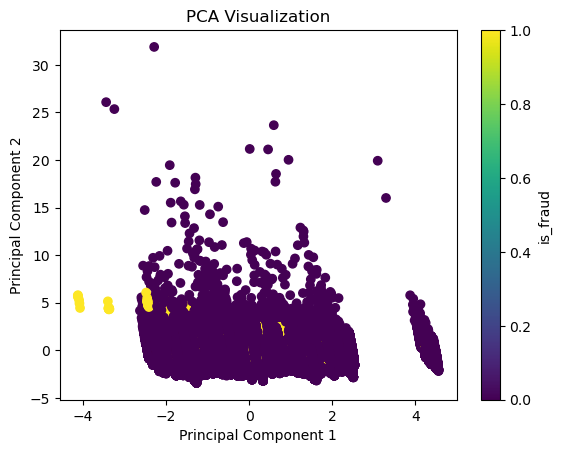

In [36]:
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df['is_fraud'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.colorbar(label='is_fraud')
plt.show()


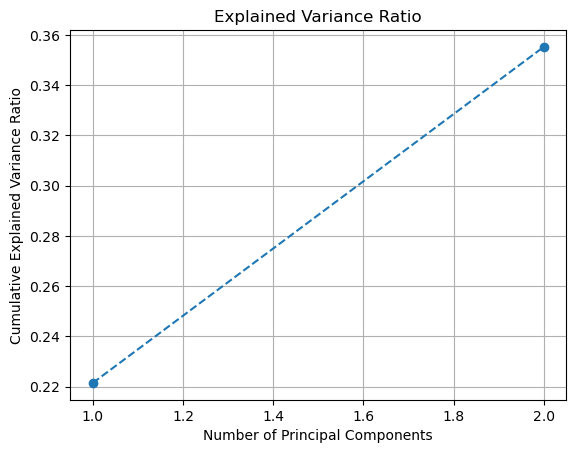

In [37]:
plt.plot(range(1, 3), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio')
plt.grid(True)
plt.show()

In [38]:
from scipy.spatial import distance

# Calculate the centroid of regular transactions
regular_transactions = df_pca[df_pca['anomaly'] == 0][['PC1', 'PC2']]
centroid = regular_transactions.mean()

# Calculate the Euclidean distance from each data point to the centroid
df_pca['distance'] = df_pca.apply(lambda row: distance.euclidean((row['PC1'], row['PC2']), centroid), axis=1)

# Set a threshold for defining anomalies
threshold = df_pca['distance'].mean() + df_pca['distance'].std()  # Adjust the threshold as needed

# Identify anomalies based on the distance threshold
df_pca['anomaly_detected'] = df_pca['distance'] > threshold

# Print the anomalies
anomalies = df[df_pca['anomaly_detected']]
print(anomalies)


                 ssn           cc_num     first     last gender  \
7        115-04-4507    4218196001337  Jonathan  Johnson      M   
9        115-04-4507    4218196001337  Jonathan  Johnson      M   
10       115-04-4507    4218196001337  Jonathan  Johnson      M   
12       115-04-4507    4218196001337  Jonathan  Johnson      M   
15       115-04-4507    4218196001337  Jonathan  Johnson      M   
...              ...              ...       ...      ...    ...   
4259142  107-40-0160  343251790447085     Isaac    Smith      M   
4259158  107-40-0160  343251790447085     Isaac    Smith      M   
4259159  107-40-0160  343251790447085     Isaac    Smith      M   
4259175  107-40-0160  343251790447085     Isaac    Smith      M   
4260846  107-40-0160  343251790447085     Isaac    Smith      M   

                            street              city state    zip      lat  \
7             863 Lawrence Valleys            Ambler    PA  19002  40.1809   
9             863 Lawrence Valleys     

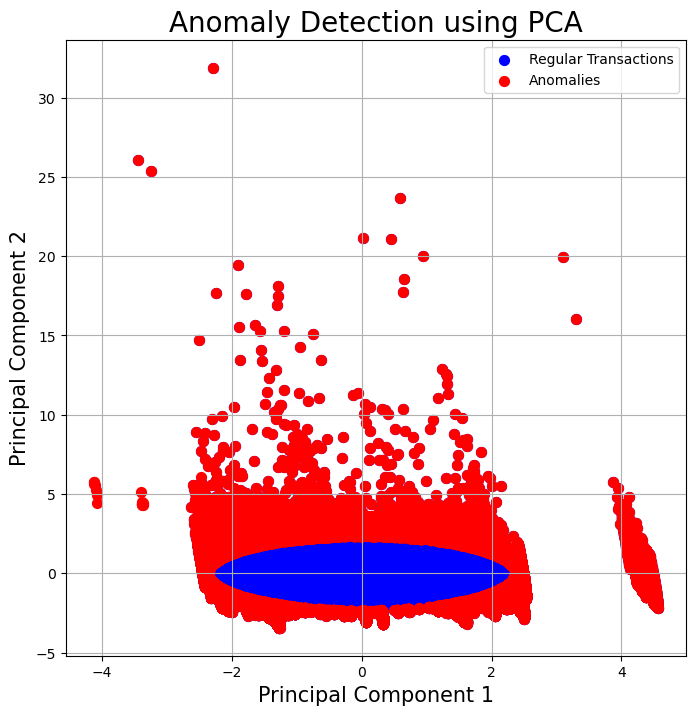

In [39]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('Anomaly Detection using PCA', fontsize=20)

# Plot regular transactions
regular_indices = df_pca['anomaly'] == 0
ax.scatter(df_pca.loc[regular_indices, 'PC1'], df_pca.loc[regular_indices, 'PC2'], c='b', s=50, label='Regular Transactions')

# Plot anomalies
anomaly_indices = df_pca['anomaly_detected']
ax.scatter(df_pca.loc[anomaly_indices, 'PC1'], df_pca.loc[anomaly_indices, 'PC2'], c='r', s=50, label='Anomalies')

ax.legend()
ax.grid()
plt.show()


In [40]:
# Analyze characteristics and patterns of identified anomalies
anomaly_data = df[df_pca['anomaly_detected']]  # Filter the dataframe for anomalies

# Analyze the distribution of anomalies by categorical features
categorical_features = ['gender', 'state', 'merchant']  # Add more categorical features if needed
for feature in categorical_features:
    feature_counts = anomaly_data[feature].value_counts()
    print(f"Anomalies by {feature}:")
    print(feature_counts)
    print()

# Analyze the statistics of anomalies by numerical features
numerical_features = ['amt', 'average_transaction_amt', 'age']  # Add more numerical features if needed
for feature in numerical_features:
    feature_stats = anomaly_data[feature].describe()
    print(f"Statistics of anomalies for {feature}:")
    print(feature_stats)
    print()

# Analyze patterns of anomalies in terms of time-based features
time_features = ['transaction_hour', 'transaction_day']  # Add more time-based features if needed
for feature in time_features:
    feature_counts = anomaly_data[feature].value_counts()
    print(f"Anomalies by {feature}:")
    print(feature_counts.sort_index())
    print()

# Analyze the merchants associated with anomalies
top_anomaly_merchants = anomaly_data['merchant'].value_counts().head(10)
print("Top Merchants associated with anomalies:")
print(top_anomaly_merchants)

Anomalies by gender:
M    288637
F    254317
Name: gender, dtype: int64

Anomalies by state:
CA    164495
NY     52520
HI     50888
MA     37811
NJ     29345
AZ     19054
PA     17439
CT     17011
TX     16776
WA     15957
ME     14752
OR     13727
AK      7754
FL      7070
OH      6206
GA      5767
CO      5034
IL      4986
VA      4955
MI      3822
VT      3756
NM      3473
MD      3135
SC      3127
NV      3098
RI      2846
LA      2604
MO      2480
IN      2419
NH      2395
NC      2340
WI      2175
AR      1988
OK      1770
UT      1464
ID      1287
NE       954
WY       806
DE       776
AL       761
WV       761
MN       484
MT       473
KY       456
DC       445
MS       371
IA       342
TN       296
KS       216
ND        80
SD         7
Name: state, dtype: int64

Anomalies by merchant:
Johnson LLC                     751
Johnson Inc                     735
Smith Group                     704
Smith PLC                       704
Smith and Sons                  691
              